# Homework 1
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/uw-astr-324-s17/astr-324-s17
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `Astr324-S17-HW1-ZeljkoIvezic.ipynb`.
* Solve problems #2 and #3 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.

## Problem 2

4-D visualization of LINEAR data for variable stars using concepts from
http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html

Instead of data for asteroids, here we use data for variable stars
from the SDSS and LINEAR surveys: 

1) SDSS u-g and g-i colors,  

2) LINEAR variability period (logP) and variability amplitude (A). 

For more details, see
http://adsabs.harvard.edu/abs/2013AJ....146..101P

Use the position in the g-i vs. u-g color-color diagram to define the symbol 
color scheme, and use it to plot the g-i vs. u-g diagram and the A vs. logP diagram. 

To give you a jump start, Problem 2 is essentially completed below.


## Problem 3

Use the position in the A vs. logP diagram to define symbol color scheme, and 
use it to plot the same two diagrams as in Problem 2.




<br>
# Solutions

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astroML.datasets import fetch_LINEAR_geneva

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [3]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

Let's define a few more useful functions:

In [4]:
def black_bg_subplot(*args, **kwargs):
# copied from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """Create a subplot with black background"""
    #kwargs['facecolor'] = 'k'
    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax

In [5]:
def compute_color2(vec1, vec2, kG=5.0, aG=0.8, kB=2.0, aB=1.2):
# adopted from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    Compute the scatter-plot color using code adapted from astroML
    http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    # define the base color scalings
    # fudge factors aG and aB control the "redness" and "greenness"
    # fudge factors kG and kB control dynamic range of color coding
    # both a and k factors need some experimenting for the best results
    R = np.ones_like(vec1)
    G = aG * 10**(kG*vec1) 
    B = aB * 10**(kB*vec2) 

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T

Obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [6]:
data = fetch_LINEAR_geneva()
# N.B. this is 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

## Problem 2

Compute RGB color based on SDSS u-g ang g-i colors:

In [7]:
# the format is (vector-vecMid)/(vecMax-vecMin), where
# vecMid is roughly the mid point of the desired range
# vecMin and vecMax is the desired range for coding 

ugNorm = (ug-1.5)/(3.0-0.0)
giNorm = (gi-0.5)/(2.5+1.0)

# for the last four parameters, see compute_color2 above
color = compute_color2(ugNorm, giNorm, 5.0, 0.8, 2.0, 1.2)

# For extra points, try to improve the plot by modifying
# these four parameters!! 

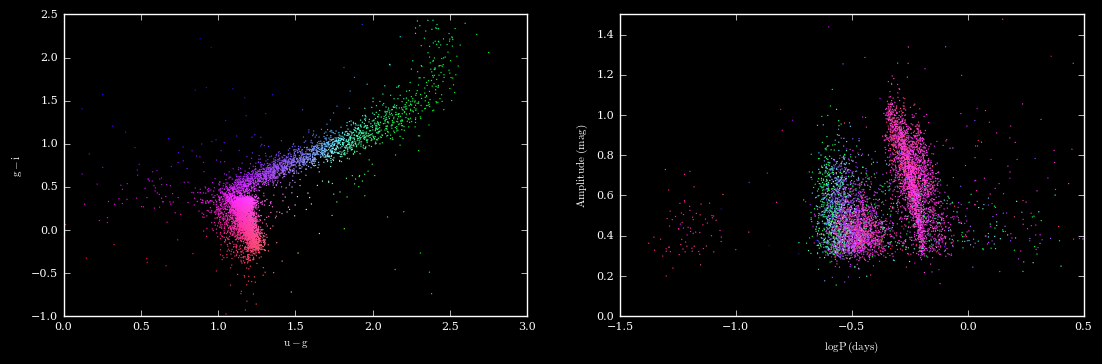

In [8]:
# set up the plot
fig = plt.figure(figsize=(12,8), facecolor='k')
#fig.set_facecolor('k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = black_bg_subplot(221)
ax1.set_axis_bgcolor("k")
ax1.scatter(ug, gi, c=color, s=0.9, lw=0)
ax1.set_xlim(0.0, 3.0)
ax1.set_ylim(-1.0, 2.5)
ax1.set_xlabel(r'${\rm u-g}$', color='w')
ax1.set_ylabel(r'${\rm g-i}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(222)
ax2.set_axis_bgcolor("k")
ax2.scatter(logP, A, c=color, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(0.0, 1.5)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='w')
ax2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='w')

plt.show()

## Problem 3

In [11]:
### follow the steps from Problem 2...
# compute RGB color based on logP and A

# plot the A vs. logP plot

# plot the color-color plot


In [9]:
color3 = compute_color2(logP, A, 5.0, 0.8, 2.0, 1.2)

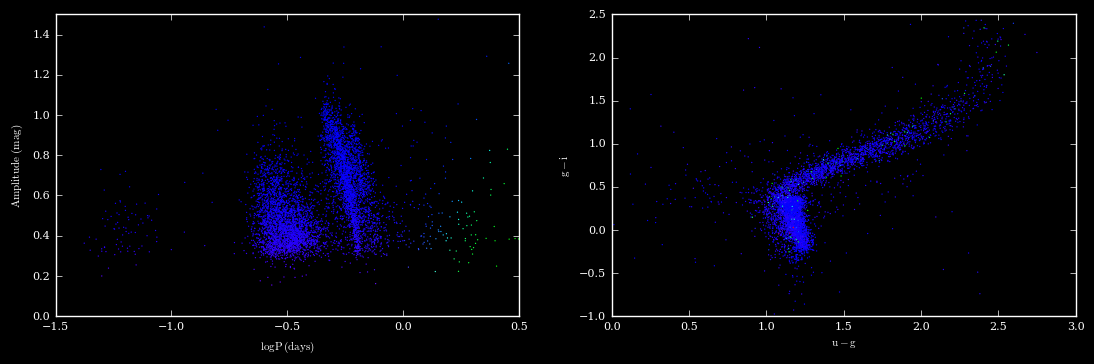

In [10]:
fig = plt.figure(figsize=(12,8), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
bx1 = black_bg_subplot(222)
bx1.set_axis_bgcolor("k")
bx1.scatter(ug, gi, c=color3, s=0.9, lw=0)
bx1.set_xlim(0.0, 3.0)
bx1.set_ylim(-1.0, 2.5)
bx1.set_xlabel(r'${\rm u-g}$', color='w')
bx1.set_ylabel(r'${\rm g-i}$', color='w')

# plot the A vs. logP plot
bx2 = black_bg_subplot(221)
bx2.set_axis_bgcolor("k")
bx2.scatter(logP, A, c=color3, s=0.9, lw=0)
bx2.set_xlim(-1.5, 0.5)
bx2.set_ylim(0.0, 1.5)
bx2.set_xlabel(r'${\rm logP \, (days)}$', color='w')
bx2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='w')
plt.show()